# IMPORTS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score, precision_score, recall_score,confusion_matrix,  ConfusionMatrixDisplay


from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.manifold import TSNE
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from IPython.display import clear_output

# DATASET PREPARATION

In [ ]:
import zipfile

with zipfile.ZipFile('sheakspeare.zip', 'r') as zip_ref:
    zip_ref.extractall()

with zipfile.ZipFile('kanyewest.zip', 'r') as zip_ref:
    zip_ref.extractall()

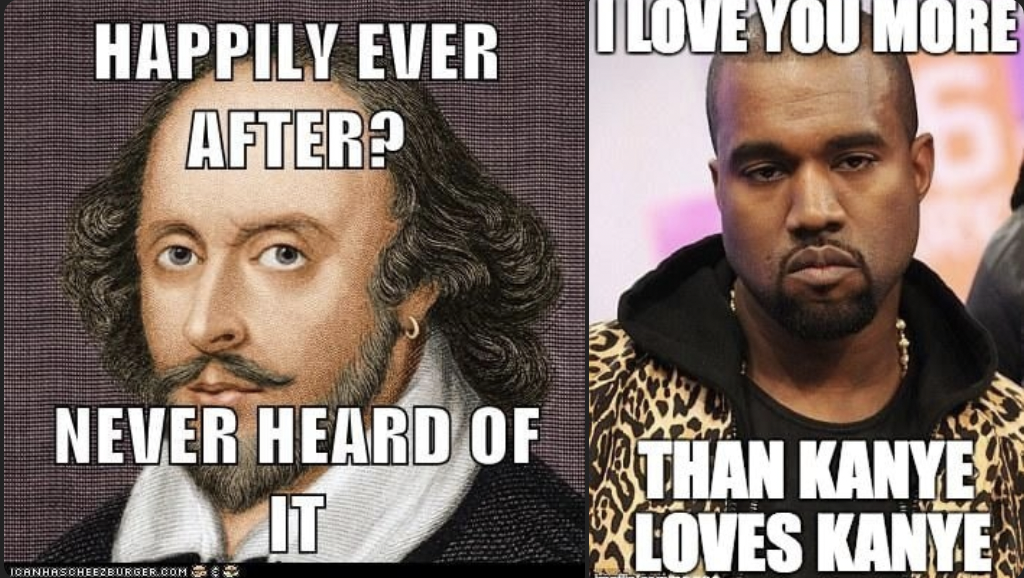

In [ ]:
import re
def shakespeare_prep(filename):
  with open(filename) as f:
    lines = f.readlines()
  sonets = "".join(lines).split('\n\n')
  sonnets = []
  for sonet in sonets:
    if sonet == "":
      pass
    else:
      sonnets.append(sonet.lower().replace("\n", " ").replace(',' , '').strip())
  sonnets = sonnets[2:-1]
  return sonnets

In [ ]:
def kanyewest_prep(filename):
  with open('Kanye West Lyrics.txt') as f:
    lines_kw = f.readlines()
  songs_kw = "".join(lines_kw).split('[Intro')
  songs = []
  for song in songs_kw:
    song = song.lower()
    song = song.replace('\n', " ")

    song = re.sub("\[.*?\]","",song)

    song = song.replace(']' , '')
    song = song.replace(':' , '')
    song = song.replace('kanye' , '')
    song = song.replace('west' , '')
    song = song.replace('jay-z' , '')
    song = song.replace('jay' , '')
    song = song.replace(',' , '')
    songs.append(song)

  return songs

In [ ]:
sonnets = shakespeare_prep('shakespeare.txt')

In [ ]:
songs = kanyewest_prep('Kanye West Lyrics.txt')

In [ ]:
dataframe = {"text": [],
             "label": []}

for sonnet in sonnets:
  dataframe['text'].append(sonnet)
  dataframe['label'].append(1)

for song in songs:
  dataframe['text'].append(song)
  dataframe['label'].append(0)

In [ ]:
table = pd.DataFrame(dataframe)
table

,text,label
0,from fairest creatures we desire increase that...,1
1,when forty winters shall besiege thy brow and ...,1
2,look in thy glass and tell the face thou viewe...,1
3,unthrifty loveliness why dost thou spend upon ...,1
4,those hours that with gentle work did frame th...,1
...,...,...
209,school spirit motherfucker alpha step omeg...,0
210,we in the streets playa get ya mail it's on...,0
211,yo gee they can't stop me from rappin' can th...,0
212,how's your son? (all the things) he made the ...,0


In [ ]:

X_train, X_test, y_train, y_test = train_test_split( table.text.values, table.label.values, test_size=0.33, random_state=42, shuffle = True)


# CSR SPARSE FORMAT

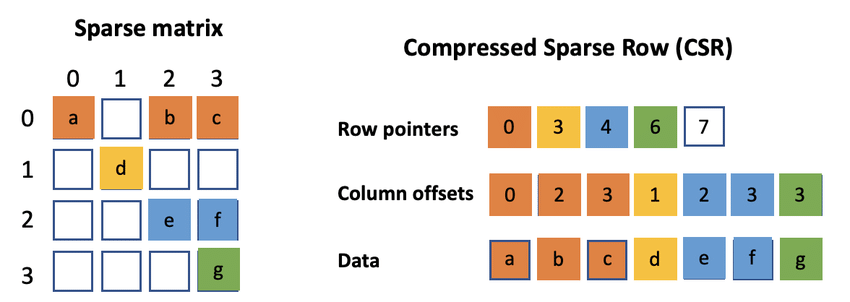

# HOW TO REPRESENT A TEXT? TF-IDF

TF stands for **term frequency**

$$
tf(t,d) = \frac{n_t}{\sum_k n_k}
$$

IDF stands for **inverse document frequency**

$$
idf(t, D)= log\frac{|D|}{|\{d_i \in  D | t \in d_i\}|}
$$

TF-IDF:

$$
tf-idf(t, d, D) = tf(t,d) \times idf(t, D)
$$

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=600)
X_train_vectorize = vectorizer.fit_transform(X_train)


In [ ]:
vectorizer.get_feature_names_out()

array(['30', 'about', 'act', 'after', 'again', 'against', 'age', 'ah',
       'ain', 'air', 'alive', 'all', 'alone', 'always', 'am', 'amazing',
       'america', 'an', 'and', 'another', 'anymore', 'anything', 'are',
       'around', 'art', 'as', 'ask', 'ass', 'at', 'away', 'ayy', 'ba',
       'baby', 'back', 'bad', 'bam', 'be', 'beat', 'beats', 'beauty',
       'because', 'bed', 'been', 'before', 'being', 'believe', 'benz',
       'best', 'better', 'big', 'bitch', 'bitches', 'black', 'blame',
       'blood', 'blow', 'body', 'both', 'bout', 'boy', 'break',
       'breaking', 'breathe', 'bright', 'bring', 'broke', 'brother',
       'bullshit', 'but', 'buy', 'by', 'call', 'called', 'came', 'can',
       'car', 'care', 'catch', 'cause', 'change', 'check', 'chi', 'chick',
       'child', 'chill', 'church', 'city', 'class', 'club', 'cold',
       'come', 'comin', 'control', 'cool', 'could', 'couldn', 'crack',
       'crazy', 'da', 'dame', 'damn', 'day', 'days', 'dead', 'death',
       'deep'

# PCA

#### We are going to reduce the feature dimension. In order to to this we will use **PCA**. **PCA** contains two steps

* Center the matrix feature-wise
* do the SVD

#### By construction **PCA** finds the directions of the greatest data spread

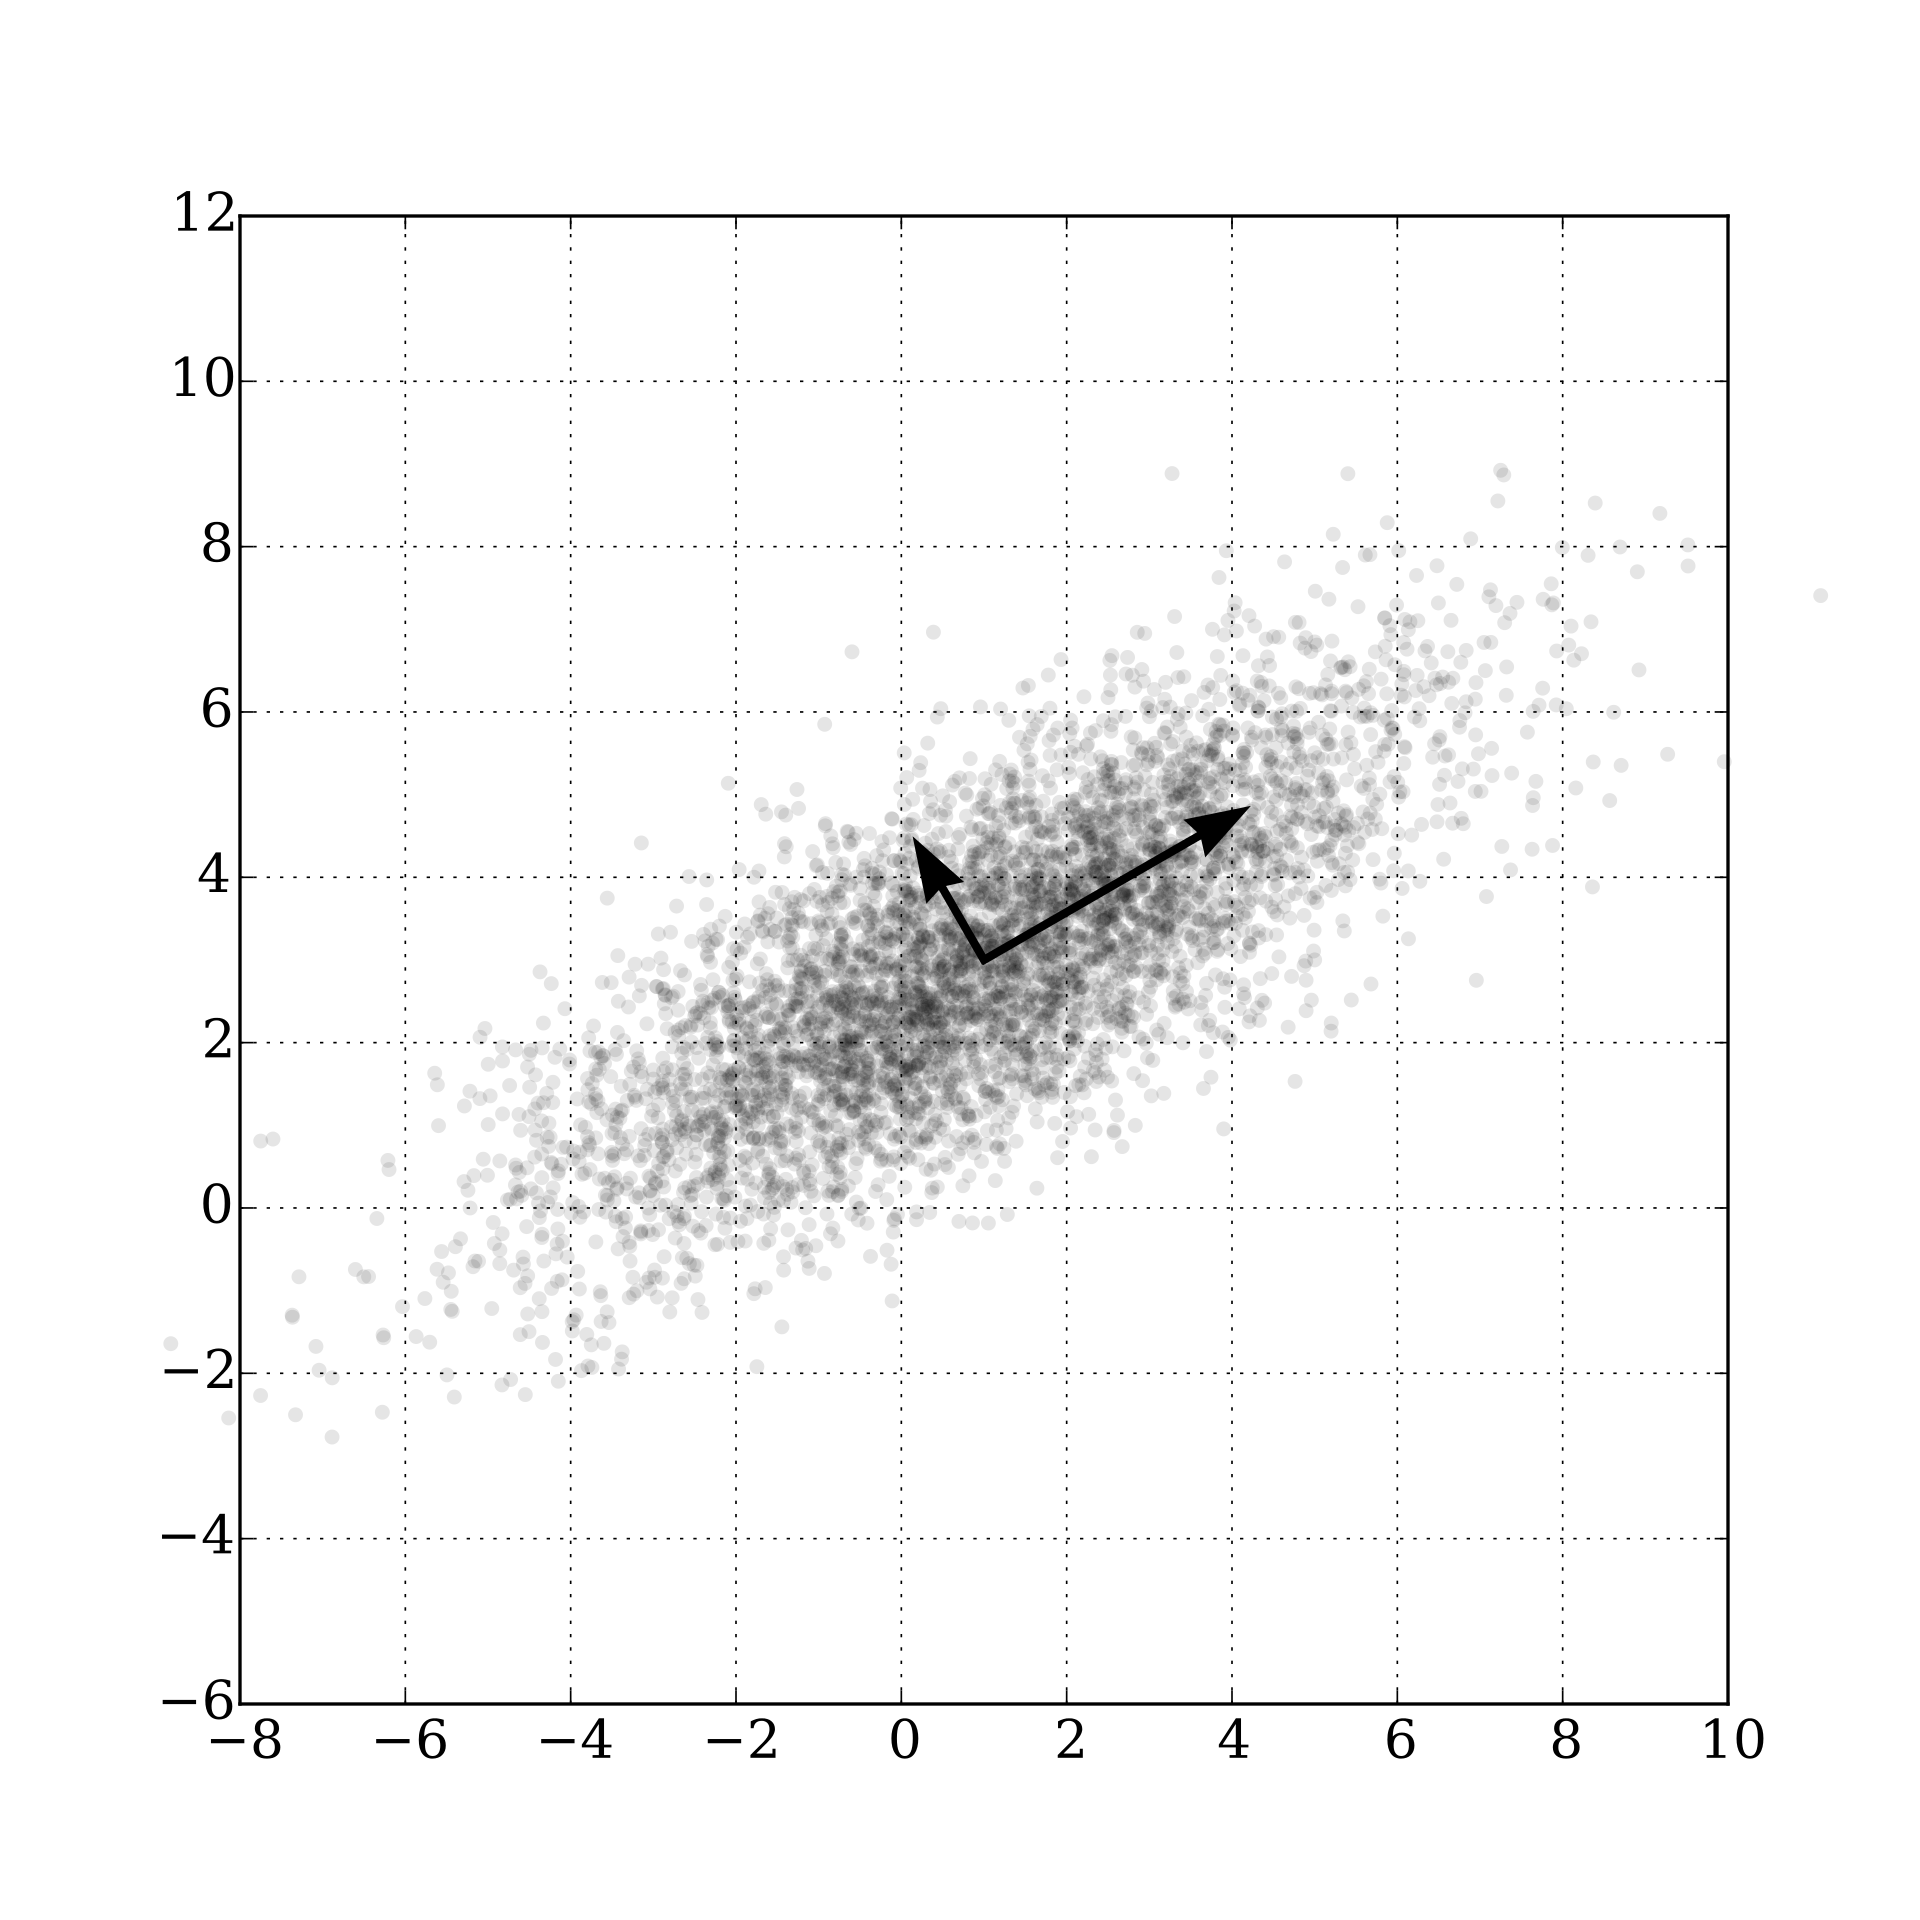

In [ ]:
pca = PCA(3)
principalComponents = pca.fit_transform(X_train_vectorize.toarray())
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_df.shape

(143, 3)

In [ ]:
COLORS = ['aquamarine', 'red',  'linen','darkmagenta', 'darkolivegreen',  'orchid' , 'honeydew', 'mediumblue','antiquewhite', 'mediumturquoise','gray', 'grey', 'green', 'aqua', 'aquamarine', 'azure']
classes = list(set(y_train))

class_colors = {}
for i in range(len(classes)):
    class_colors[classes[i]] = COLORS[i % len(COLORS)]

print(class_colors)
color_list = [class_colors[a] for a in y_train]

{0: 'aquamarine', 1: 'red'}


In [ ]:

fig = go.Figure([

go.Scatter3d(x=principal_df.iloc[:1000, 0].values,
             y=principal_df.iloc[:1000, 1].values,
             z=principal_df.iloc[:1000, 2].values,
             mode='markers',text = y_test, marker={'size': 7,
              'opacity': 1,
              'color': color_list[:1000]
              }  )])

In [ ]:
fig.show()

# LOGISTIC REGRESSION

The most straightforward classifier is logistic regression. We train the model to predict the probability of which side of the dividing hyperplane an object will be located on. For this purpose we will need **sigmoid function**

$$σ(x) = \frac {1}{1+e^{-x}}$$

**Sigmoid is easy to take derivative of**

$$\sigma'(x) =\sigma(x) (1- \sigma(x))$$

**Logistic Regression**. The input  **x** transforms the following way

$$\frac{1}{1+e^{-((wx) +b)}}$$

**Loss Function** - cross-entropy.

$$L(y, \hat{y})= - \frac{1}{n}\sum_i^{n}[ y_i log(\hat{y}) +  (1-y_i )log(1 - \hat{y})] $$



In [ ]:

def surface_func (w, b, xx,yy ):
   z = lambda xx, yy: (-b - w[0] * xx - w[1] * yy) /w[2]
   return z(xx,yy)


def draw_3d (w, b, X, colors):
  tmp = np.linspace(-2,2,10)
  xx,yy = np.meshgrid(tmp,tmp)
  fig = go.Figure([go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2], mode="markers", showlegend=False,
                                marker=dict(color=colors)
                        ),
           go.Surface(x=xx, y=yy, z=surface_func (w, b, xx,yy ), opacity=.5, showscale=False,
                      surfacecolor=np.zeros(xx.shape), colorscale=[[0, 'blue']])])

  fig.update_layout(
    scene = dict(zaxis = dict(nticks=4, range=[-2,5.9])))
  fig.show()



#### Let us divide our data with some random separating hyper plane and

In [ ]:
w =  np.array([[0.0815486757],
        [0.87359117],
        [0.044506031]])
b =   0.23607449804923242


In [ ]:
def coloring(w, b, X):

  color_1 = 'rgb(150, 208, 252)'
  color_2 = 'rgb(160, 17, 53)'
  colors = []
  for i in range(X.shape[0]):
    if (X[i, :] @ w + b) < 0.0:
      colors.append(color_1)
    if (X[i, :] @ w + b)  >= 0.0:
      colors.append(color_2)
  return colors

In [ ]:

colors = coloring(w, b, principal_df.values)
draw_3d (w, b, principal_df.values, colors)

#### We are going to implement logistic regression. In order to do this let us implement some auxilqqary functions

In [ ]:
# Normalize features in X
def normalize(X):

    m, n = X.shape
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)

    return X

# sigmoid
def  sigmoid(w,X, b):

    linear  =  X @ w + b
    sigm = 1.0 / (1.0 + np.exp(-linear))
    return sigm

#Loss function
def loss(y_hat, y):
    l = - np.mean(y*np.log(y_hat) + (1-y)* np.log(1-y_hat))
    return l


#Gradients
def gradients (y_Hat, X, y):
   m = X.shape[0]
   dw = (X.T @ (y_hat - y) )/m
   db = np.sum(y_hat - y) / m
   return dw, db




#### NOW we are going to implement iterative  gradient descent of our loss function. In order to do this, compute the predicitions, compute loss, compute gradients and substruct gradients from the corresponding parameters.

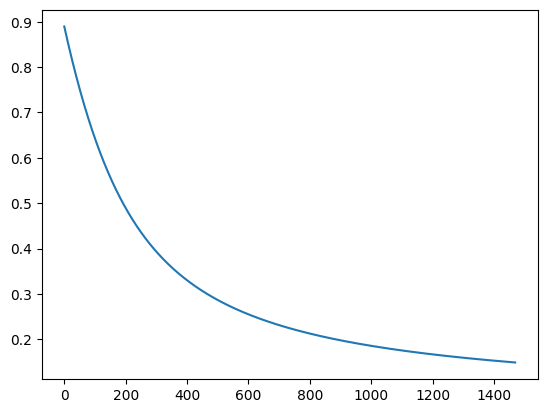

In [ ]:

lr = 0.01
epochs = 2000
m, n = principal_df.values.shape



# Reshaping y.
y = y_train.reshape(m,1)

# Normalizing the inputs.
X = normalize(principal_df.values)

# Empty list to store losses.
losses = []

# Training loop.
for epoch in range(epochs):



    # prediction.
    y_hat = sigmoid(w, X,  b)

    # Calculating loss and appending it in the list.
    l = loss(y_hat, y)
    losses.append(l)

    # Getting the gradients of loss w.r.t parameters.
    dw, db = gradients (y_hat, X, y)

    # Updating the parameters.
    w -= lr*dw
    b -= lr*db

    clear_output(wait = True)

    plt.plot(losses)
    plt.show()




In [ ]:
colors = coloring(w, b, X)
draw_3d (w, b, X, colors)

# METRICS

#### We will need two methods in order to study the following task

In [ ]:
def predict(X, w, b):
  classes = []
  for i in range(X.shape[0]):
    if (sigmoid(w,X[i, :] , b)) < 0.5:
      classes.append(0)
    if (sigmoid(w,X[i, :] , b))  >= 0.5:
      classes.append(1)
  return np.array(classes)

### BEFORE STARTING METRICS LETS FIND OUT WHICH DOOTS WERE MISCLASSIFIED

In [ ]:
for i,j in zip(X_train[y_train != predict(X, w, b)], y_train[y_train != predict(X, w, b)]):
  if j == 0:
    print('KANYE WEST IN DA CLUB')
    print()
    print( i)
    print()
  else:
    print('Shakespeare, My lord, is here')
    print()
    print( i)
    print()

Shakespeare, My lord, is here

what is your substance whereof are you made that millions of strange shadows on you tend? since every one hath every one one shade and you but one can every shadow lend: describe adonis and the counterfeit is poorly imitated after you on helen's cheek all art of beauty set and you in grecian tires are painted new:   speak of the spring and foison of the year the one doth shadow of your beauty show the other as your bounty doth appear and you in every blessed shape we know. in all external grace you have some part but you like none none you for constant heart.

KANYE WEST IN DA CLUB

   well right so so well well right so so high as the sun come out plannin' bootin' plannin' movin' plannin' tubin' there well well    clean us like the rain in spring take the chlorine out our conversation let your light reflect on me i promise i'm not hiding anything it's water we are water pure as water like a newborn daughter    the storm may come but we'll get through it 

In [ ]:
def predict_proba(X, w, b):
  probas = []
  for i in range(X.shape[0]):
    probas.append(sigmoid(w,X[i, :] , b)[0])
  return np.array(probas)

#### We get the normalized PCA features for test set

In [ ]:
X_test_vectorize = vectorizer.transform(X_test)

PCA_test = pca.transform(X_test_vectorize.toarray())
PCA_test = normalize(PCA_test)

In [ ]:
PCA_test

array([[ 2.55636118e-01, -8.13148067e-01, -9.96905941e-01],
       [-1.13664942e+00,  6.83496512e-01,  2.55521728e-01],
       [-2.75580741e-01, -1.75812093e+00, -9.06093934e-01],
       [-7.83054857e-01, -1.82748093e-02,  1.66802215e+00],
       [ 1.21316440e+00,  1.27531770e+00,  3.96508626e-01],
       [ 8.86586390e-01, -1.63704015e-01,  5.92834831e-01],
       [ 1.22179033e+00,  7.91567780e-01,  1.75648528e-01],
       [ 1.38689733e+00,  1.65920174e+00, -4.33411482e-01],
       [ 1.23978796e+00,  1.27540678e+00,  4.63351275e-01],
       [-4.32437567e-01,  1.23911878e-02, -3.83833491e-01],
       [-1.13447715e+00,  3.82190462e-01,  3.81252881e-01],
       [-1.12799078e+00,  4.93727074e-01, -5.66505710e-02],
       [-7.66336460e-01, -4.83241362e-02, -7.93815603e-01],
       [ 1.44165261e+00,  2.06104058e+00,  2.89170184e-01],
       [-1.08911438e+00,  2.37208580e-01,  1.94927121e-01],
       [-1.56615362e+00,  7.46453426e-01,  8.34403953e-02],
       [-1.05958035e+00,  3.89069951e-01

In [ ]:
predict(PCA_test, w, b)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1])

In [ ]:
y_test

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1])

In [ ]:
predict_proba(PCA_test, w, b)

array([0.93975801, 0.08553616, 0.93147534, 0.26706648, 0.90663195,
       0.95895622, 0.94731352, 0.91493036, 0.91065998, 0.53015256,
       0.11505584, 0.11151902, 0.37847769, 0.87079632, 0.14974912,
       0.03264782, 0.14078683, 0.98053958, 0.66299936, 0.162282  ,
       0.8757346 , 0.05609647, 0.13656613, 0.13912072, 0.01678146,
       0.93744835, 0.87899432, 0.98298269, 0.35201368, 0.98905643,
       0.96325642, 0.92500839, 0.01040704, 0.97051089, 0.86233895,
       0.35135092, 0.11146814, 0.08443737, 0.80948701, 0.9264795 ,
       0.92931276, 0.43220305, 0.95342281, 0.90580585, 0.2861326 ,
       0.85596455, 0.95991094, 0.92447564, 0.97350882, 0.91999741,
       0.93116252, 0.97794899, 0.97826951, 0.9317487 , 0.97202978,
       0.96353072, 0.05519961, 0.94410978, 0.65267608, 0.93750053,
       0.95401992, 0.89215466, 0.95860327, 0.10726207, 0.28422061,
       0.93972238, 0.93114947, 0.92923107, 0.00960736, 0.96525747,
       0.84185624])

## CONFUSION MATRIX

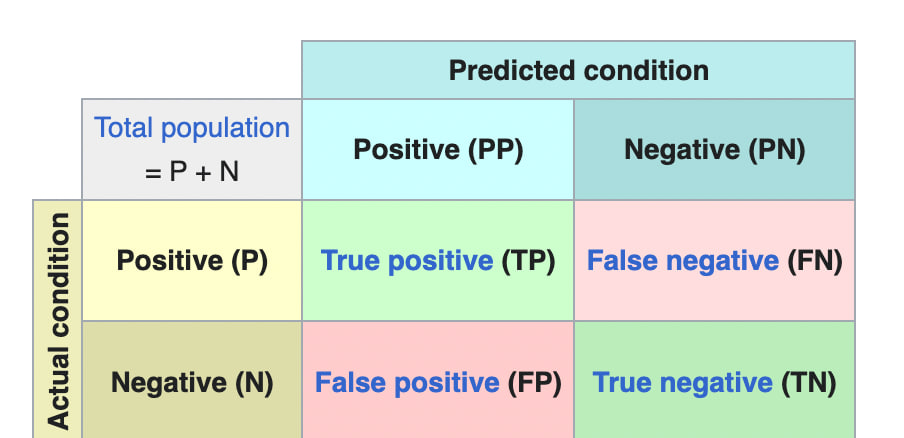

In [ ]:
cm = confusion_matrix(y_test, predict(PCA_test, w, b))

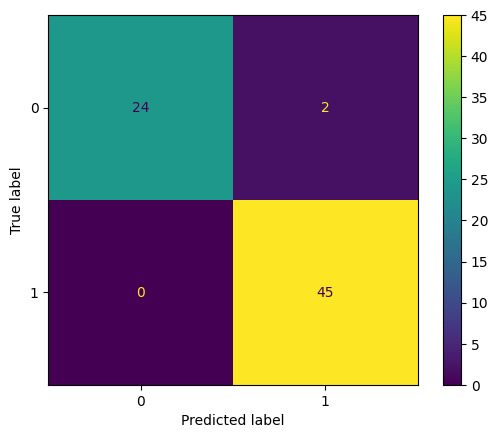

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

#### Here let me briefly remind you of the errors of first and second lind that are completely described by this image

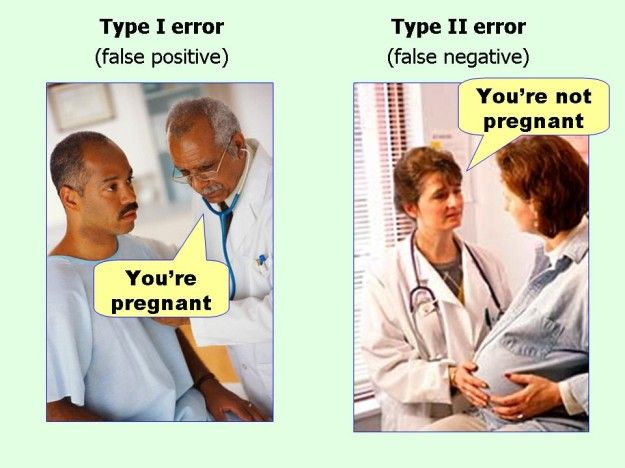

## PRECISION SCORE

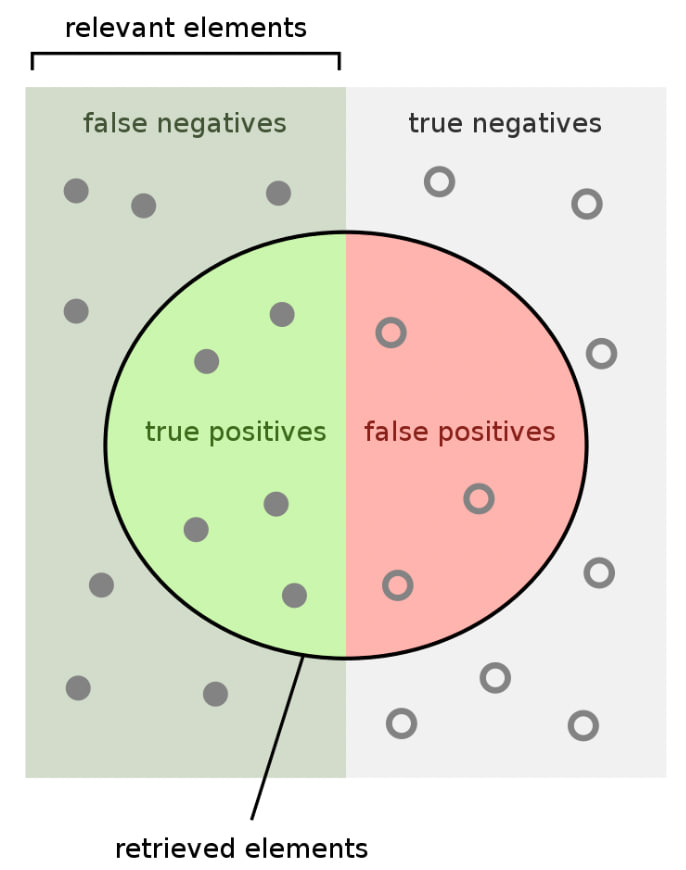


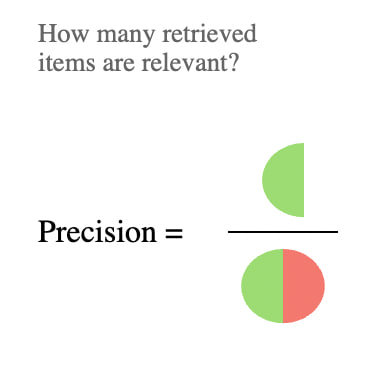

$$
precision = \frac{TP}{TP+FP}
$$

In [ ]:
precision_score(y_test,predict(PCA_test, w, b) )

0.9574468085106383

## RECALL


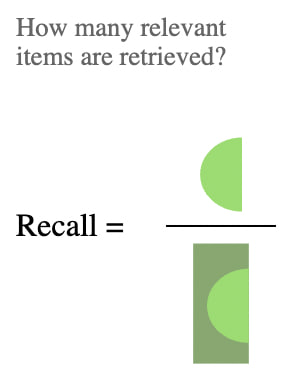

$$
recall = \frac{TP}{TP+FN}
$$

In [ ]:
recall_score(y_test,predict(PCA_test, w, b) )

1.0

# ROC-AUC CURVE

#### ROC-Curve, or receiver operating characteristic curve, is a graphical plot that illustrates the performance of a binary classifier model at varying threshold values.

####The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR) at each threshold setting.


$$
TPR = \frac{TP}{TP+FN}
$$

$$
FPR = \frac{FP}{FP+TN}
$$

####In order to understand ROC curve tale a look at the predict method. To make a decision you are using treshold == 0.5. Having this threshold you can compute TPR and FPR. Now you can vary threshold and get new pair of TPR and FPR. It is clear that for maximal treshold you would get (0,0) for TPR and FPR, and (1,1) for minimal threshold. Roc curve is a curve that starts at (0,0) ends in (1,1) and each bin corresponds to different threshold.

## HOW TO CONSTRUCT ROC CURVE?



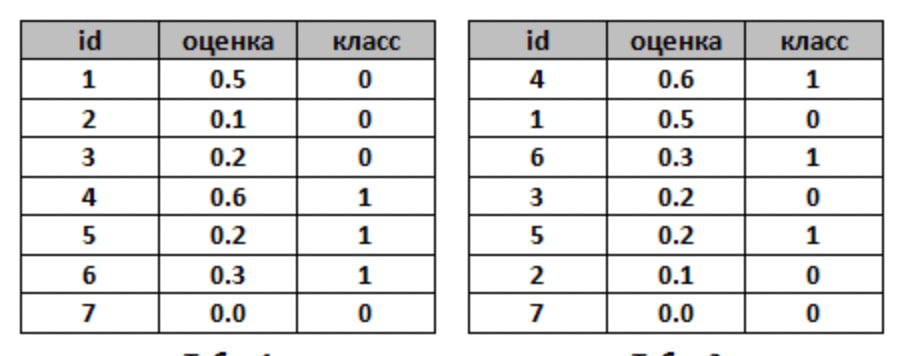

First you sort  your objects relying on the probability (from the biggest value to smallest) predict_proba method provided in order to get the table on the right from the table on the left

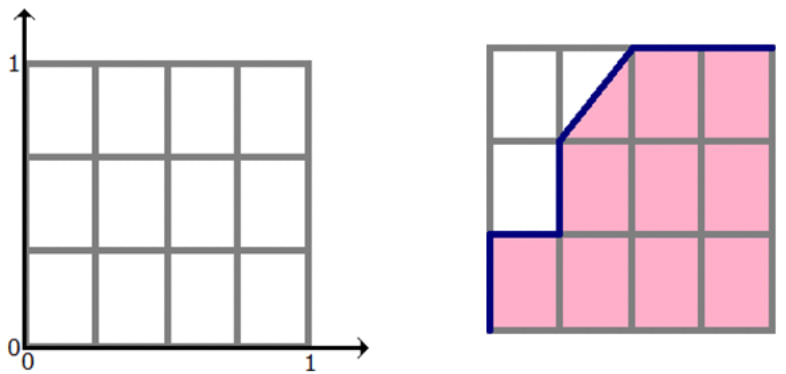

Then you devide a unit square into M$\times$ N cells. M bins on the X axis go for objects of class 0, N bins on the Y axis go for objects of class 1.

Then You go straight down the table on the write and if you have an object of class 1 you go up, if have an objecct of class 0 you go to the right.

If the same probability goes for two classes you go in diagonal way.

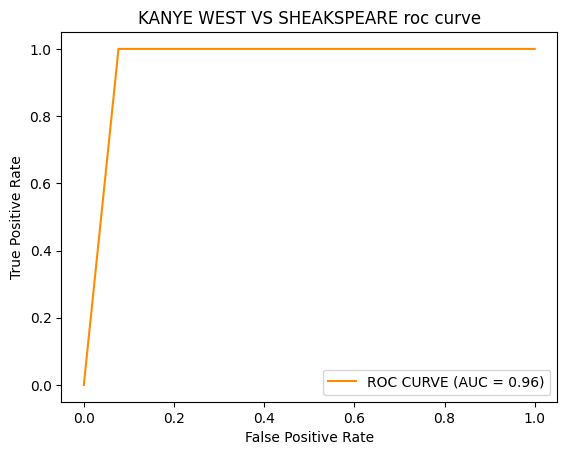

In [ ]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_test,
    predict(PCA_test, w, b),
    name="ROC CURVE",
    color="darkorange",

)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="KANYE WEST VS SHEAKSPEARE roc curve",
)

####  ROC-AUC score is an area under the curve score.

####What is the worstvakue for roc-auc?

In [ ]:



roc_auc_score(y_test, predict_proba(PCA_test, w, b))

1.0